In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bridgescaler.distributed import DQuantileTransformer, DStandardScaler
from bridgescaler import print_scaler, read_scaler
from matplotlib import colormaps
from glob import glob

%matplotlib inline

In [4]:
ls / glade / derecho / scratch / dgagne / credit_scalers

era5_quantile_scalers_2024-02-13_05:12.parquet
era5_quantile_scalers_2024-02-13_07:33.parquet


In [5]:
e5_scaler = pd.read_parquet(
    "/glade/derecho/scratch/dgagne/credit_scalers/era5_quantile_scalers_2024-02-13_07:33.parquet"
)

In [7]:
scalers_3d = np.array([read_scaler(x) for x in e5_scaler["scaler_3d"]])

In [12]:
scalers_3d[0].centroids_.shape

(60, 1000, 2)

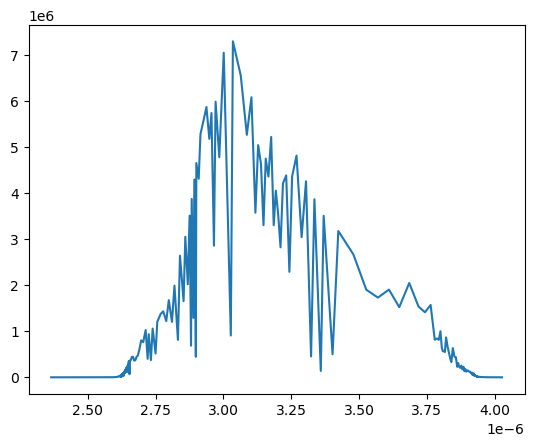

In [16]:
i = 46
plt.plot(scalers_3d[0].centroids_[i, :, 0], scalers_3d[0].centroids_[i, :, 1])

In [19]:
ls / glade / derecho / scratch / schreck / STAGING

All_2010_staged.mean.LatLonLev.nc
All_2010_staged.mean.LatLonLev.SLO.nc
All_2010_staged.mean.Lev.nc
All_2010_staged.mean.Lev.SLO.nc
All_2010_staged.mean.nc
All_2010_staged.SL.mean.nc
All_2010_staged.SLO.mean.nc
All_2010_staged.SLO.std.nc
All_2010_staged.SL.std.nc
All_2010_staged.std.LatLonLev.nc
All_2010_staged.std.LatLonLev.SLO.nc
All_2010_staged.std.Lev.nc
All_2010_staged.std.Lev.SLO.nc
All_2010_staged.std.nc
All_diff_Q_2010_staged.mean.nc
All_diff_Q_2010_staged.STD.nc
All_diff_Q500_2010_staged.mean.nc
All_diff_Q500_2010_staged.STD.nc
All_diff_SP_2010_staged.mean.nc
All_diff_SP_2010_staged.STD.nc
All_diff_T_2010_staged.mean.nc
All_diff_T_2010_staged.STD.nc
All_diff_t2m_2010_staged.mean.nc
All_diff_t2m_2010_staged.STD.nc
All_diff_T500_2010_staged.mean.nc
All_diff_T500_2010_staged.STD.nc
All_diff_U_2010_staged.mean.nc
All_diff_U_2010_staged.SL.mean.nc
All_diff_U_2010_staged.STD.nc
All_diff_U500_2010_staged.mean.nc
All_diff_U500_2010_staged.STD.nc
All_diff_V_2010_staged.mean.nc
All_diff

In [20]:
ds = xr.open_dataset(
    "/glade/derecho/scratch/schreck/STAGING/All_2010_staged.mean.LatLonLev.nc"
)

In [34]:
lon = ds["longitude"].values
lon[lon > 180] = lon[lon > 180] - 360
lat = ds["latitude"].values
lon_grid, lat_grid = np.meshgrid(lon, lat)

In [40]:
np.vstack((lon_grid.ravel(), lat_grid.ravel())).shape

(2, 819200)

In [43]:
np.concatenate([[(5, 3), (4, 6)], [(2, 245)]]).shape

(3, 2)

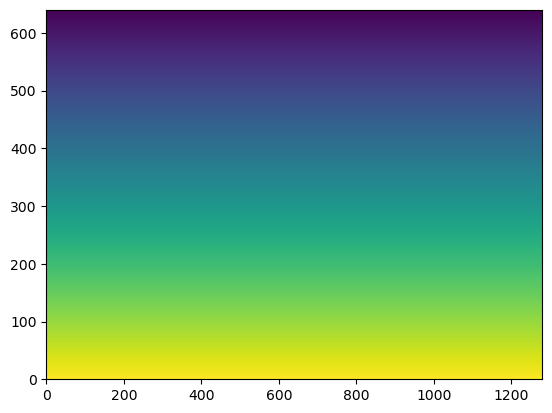

In [38]:
plt.pcolormesh(lat_grid)

In [4]:
eds = xr.open_zarr(
    "/glade/derecho/scratch/schreck/STAGING/TOTAL_1997-01-01_1997-12-31_staged.zarr"
)

In [107]:
all_era5_files = sorted(glob("/glade/derecho/scratch/schreck/STAGING/TOTAL*"))

In [111]:
for e5 in all_era5_files:
    if "_small_" in e5:
        print(e5)
        all_era5_files.remove(e5)

In [115]:
all_era5_files

['/glade/derecho/scratch/schreck/STAGING/TOTAL_1979-01-01_1979-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1980-01-01_1980-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1981-01-01_1981-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1983-01-01_1983-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1984-01-01_1984-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1986-01-01_1986-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1987-01-01_1987-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1988-01-01_1988-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1989-01-01_1989-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1990-01-01_1990-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1992-01-01_1992-12-31_staged.zarr',
 '/glade/derecho/scratch/schreck/STAGING/TOTAL_1993-01-01_1993-12-31_staged.zarr',
 '/g

In [116]:
37 / 2

18.5

In [84]:
eds.time[0:24]

<xarray.DataArray 'time' (time: 24)>
array(['1997-01-01T00:00:00.000000000', '1997-01-01T01:00:00.000000000',
       '1997-01-01T02:00:00.000000000', '1997-01-01T03:00:00.000000000',
       '1997-01-01T04:00:00.000000000', '1997-01-01T05:00:00.000000000',
       '1997-01-01T06:00:00.000000000', '1997-01-01T07:00:00.000000000',
       '1997-01-01T08:00:00.000000000', '1997-01-01T09:00:00.000000000',
       '1997-01-01T10:00:00.000000000', '1997-01-01T11:00:00.000000000',
       '1997-01-01T12:00:00.000000000', '1997-01-01T13:00:00.000000000',
       '1997-01-01T14:00:00.000000000', '1997-01-01T15:00:00.000000000',
       '1997-01-01T16:00:00.000000000', '1997-01-01T17:00:00.000000000',
       '1997-01-01T18:00:00.000000000', '1997-01-01T19:00:00.000000000',
       '1997-01-01T20:00:00.000000000', '1997-01-01T21:00:00.000000000',
       '1997-01-01T22:00:00.000000000', '1997-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1997-01-01 ... 1997-01-01T23:00:00

In [100]:
vars_3d = ["U", "V", "T", "Q"]
levels = eds.level.values
var_levels = []
var_slices = []
time = eds["time"][0:1]
for var in vars_3d:
    for level in levels:
        var_slices.append(eds[var].sel(time=time, level=level))
        var_levels.append(f"{var}_{level:d}")

e2 = xr.concat(var_slices, pd.Index(var_levels, name="variable"))
e3 = e2.transpose("time", "latitude", "longitude", "variable").load().persist()

In [93]:
e3

<xarray.DataArray 'U' (time: 24, latitude: 640, longitude: 1280, variable: 60)>
array([[[[-3.1381645e+01, -6.3714638e+00,  3.9049911e-01, ...,
           4.9335143e-04,  4.3932992e-04,  4.7024360e-04],
         [-3.1186333e+01, -6.3675575e+00,  3.7096786e-01, ...,
           4.9335143e-04,  4.3980675e-04,  4.7072044e-04],
         [-3.0987114e+01, -6.3616982e+00,  3.5143661e-01, ...,
           4.9382827e-04,  4.4028359e-04,  4.7119727e-04],
         ...,
         [-3.1967583e+01, -6.3851357e+00,  4.4713974e-01, ...,
           4.9239775e-04,  4.3837624e-04,  4.6928992e-04],
         [-3.1772270e+01, -6.3812294e+00,  4.2760849e-01, ...,
           4.9287459e-04,  4.3885308e-04,  4.6976676e-04],
         [-3.1576958e+01, -6.3773232e+00,  4.1003036e-01, ...,
           4.9287459e-04,  4.3932992e-04,  4.6976676e-04]],

        [[-2.9502739e+01, -4.8577919e+00,  7.4206161e-01, ...,
           5.1814696e-04,  4.6650963e-04,  4.9837702e-04],
         [-2.9319145e+01, -4.8577919e+00,  7.2448349e-01, ...,
           5.1910063e-04,  4.6794015e-04,  4.9933069e-04],
         [-2.9131645e+01, -4.8558388e+00,  7.0690536e-01, ...,
           5.2005431e-04,  4.6889382e-04,  5.0076121e-04],
...
           3.5159141e-04,  3.7005817e-04,  3.6679284e-04],
         [ 3.6567535e+00,  5.2017975e-01, -2.7212791e+00, ...,
           3.5159141e-04,  3.7005817e-04,  3.6679284e-04],
         [ 3.6176910e+00,  5.1041412e-01, -2.7251854e+00, ...,
           3.5206825e-04,  3.7005817e-04,  3.6679284e-04]],

        [[ 3.7661285e+00,  6.0025787e-01, -2.6978416e+00, ...,
           3.0724556e-04,  3.8293278e-04,  3.6917703e-04],
         [ 3.7348785e+00,  5.9244537e-01, -2.6997948e+00, ...,
           3.0724556e-04,  3.8293278e-04,  3.6917703e-04],
         [ 3.6997223e+00,  5.8267975e-01, -2.7037010e+00, ...,
           3.0724556e-04,  3.8293278e-04,  3.6870019e-04],
         ...,
         [ 3.8676910e+00,  6.2760162e-01, -2.6861229e+00, ...,
           3.0676872e-04,  3.8293278e-04,  3.6917703e-04],
         [ 3.8364410e+00,  6.1783600e-01, -2.6900291e+00, ...,
           3.0724556e-04,  3.8293278e-04,  3.6917703e-04],
         [ 3.8012848e+00,  6.1002350e-01, -2.6939354e+00, ...,
           3.0724556e-04,  3.8293278e-04,  3.6917703e-04]]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
    level      (variable) int32 10 30 40 50 60 70 80 ... 100 105 110 120 130 136
  * longitude  (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time       (time) datetime64[ns] 1997-01-01 ... 1997-01-01T23:00:00
  * variable   (variable) object 'U_10' 'U_30' 'U_40' ... 'Q_130' 'Q_136'
Attributes: (12/20)
    QuantizeGranularBitGroomNumberOfSignificantDigits:  7
    grid_specification:                                 0.28125° x ~0.28125° ...
    long_name:                                          U component of wind
    maximum_value:                                      179.09194946289062
    minimum_value:                                      -123.04468536376953
    original_data_representation:                       T639 spherical harmon...
    ...                                                 ...
    wmo_center:                                         98
    wmo_discipline:                                     0
    wmo_local_table:                                    0
    wmo_master_table:                                   5
    wmo_parameter_category:                             2
    wmo_parameter_number:                               2

In [96]:
qt = DQuantileTransformer(distribution="normal")
%timeit qt.fit(e3)

1min 51s ± 388 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
st = DStandardScaler()
%timeit st.fit(e3)

22.9 s ± 8.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
111 / 23

4.826086956521739

Text(0.5, 1.0, 'QV distributions by level (lighter is higher)')

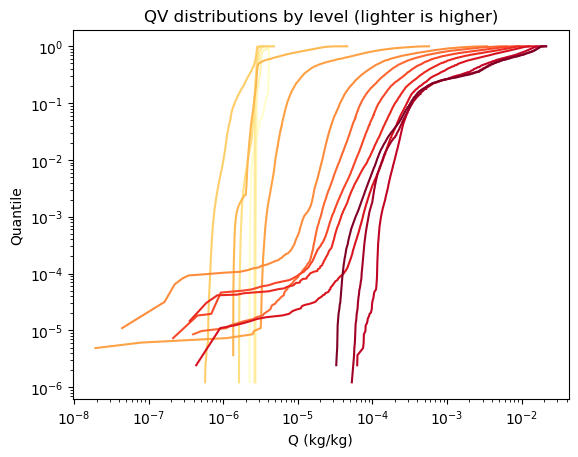

In [74]:
cm = colormaps["YlOrRd"].resampled(15)
for c, i in enumerate(range(45, 60)):
    plt.plot(
        qt.centroids_[i, :, 0],
        np.cumsum(qt.centroids_[i, :, 1] / np.nansum(qt.centroids_[i, :, 1])),
        color=cm(c / 15),
    )

plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Q (kg/kg)")
plt.ylabel("Quantile")
plt.title("QV distributions by level (lighter is higher)")

In [98]:
%timeit e4 = qt.transform(e3.astype('float64'))

3min 21s ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


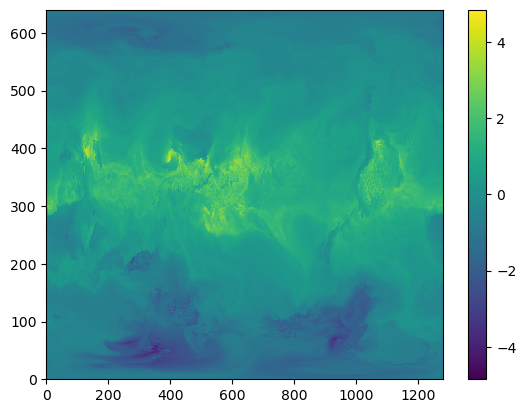

In [82]:
plt.pcolormesh(e4.sel(variable="Q_130"))
plt.colorbar()

In [102]:
qjson = print_scaler(qt)
pd.DataFrame([(qjson, qjson), (qjson, qjson)], columns=["3d", "surf"])

,3d,surf
0,"{\n ""_fit"": true,\n ""centroids_"": {\n ...","{\n ""_fit"": true,\n ""centroids_"": {\n ..."
1,"{\n ""_fit"": true,\n ""centroids_"": {\n ...","{\n ""_fit"": true,\n ""centroids_"": {\n ..."
